# Tarea 1

In [6]:
import pandas as pd

salaries_df = pd.read_csv('Salaries.csv')
salaries_df = salaries_df.drop(columns=['Unnamed: 0'])
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
salaries_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
import numpy as np
np.concatenate([salaries_df.company_location.unique(), ['Global']])

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE', 'Todos'], dtype=object)

In [23]:
not_usd_salaries_df = salaries_df[salaries_df['salary_currency'] != 'USD'].reset_index(drop=True)
not_usd_salaries_df['convertion_rate'] = not_usd_salaries_df['salary_in_usd']/not_usd_salaries_df['salary']
convertion_rate_df = pd.DataFrame(not_usd_salaries_df.groupby(['salary_currency', 'work_year'])['convertion_rate'].mean().reset_index())
convertion_rate_df

,salary_currency,work_year,convertion_rate
0,AUD,2022,0.722523
1,BRL,2021,0.185361
2,CAD,2020,0.745885
3,CAD,2021,0.797622
4,CAD,2022,0.787911
5,CHF,2022,1.063878
6,CLP,2021,0.001317
7,CNY,2020,0.144920
8,CNY,2022,0.155150
9,DKK,2020,0.152987


<Axes: xlabel='work_year', ylabel='convertion_rate'>

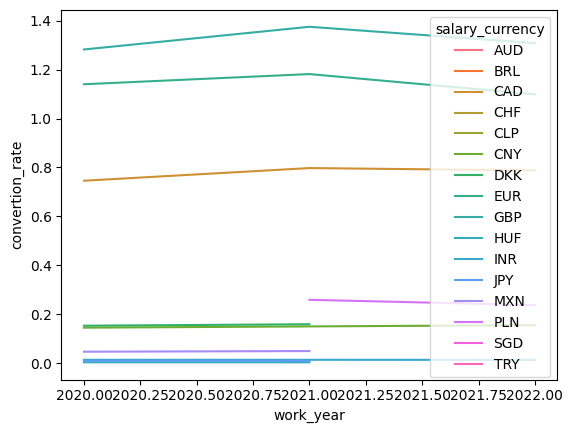

In [21]:
import seaborn as sns

#sns.scatterplot(convertion_rate_df, x='work_year', y='convertion_rate', hue='salary_currency')
sns.lineplot(data=convertion_rate_df, x='work_year', y='convertion_rate', hue='salary_currency')

In [5]:
average_salary_company_location = salaries_df.groupby(['company_location'])['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
average_salary_company_location

,company_location,salary_in_usd
43,RU,157500.000000
48,US,144055.261972
38,NZ,125000.000000
24,IL,119059.000000
29,JP,114127.333333
3,AU,108042.666667
0,AE,100000.000000
14,DZ,100000.000000
26,IQ,100000.000000
6,CA,99823.733333


In [10]:
df = pd.DataFrame(salaries_df.employment_type.value_counts()).reset_index(inplace=False)
#df.columns = ['employment_type', 'count']
df

,employment_type,count
0,FT,588
1,PT,10
2,CT,5
3,FL,4


In [23]:
df = pd.DataFrame(salaries_df.company_location.value_counts()).reset_index(inplace=False)

threshold = 10 

other_count = df[df['count'] < threshold]['count'].sum()

other_row = {'company_location': 'OTHER', 'count': other_count}
filtered_list = df[df['count'] >= threshold].to_dict('records')
filtered_list.append(other_row)
other_df = pd.DataFrame(filtered_list)
other_df

,company_location,count
0,US,355
1,GB,47
2,CA,30
3,DE,28
4,IN,24
5,FR,15
6,ES,14
7,GR,11
8,OTHER,83


In [44]:
# how many entries are in the US
us_salaries = salaries_df[salaries_df['employee_residence'] == 'US']
us_salaries.shape[0]

332

In [ ]:
salaries_df.info()

In [ ]:
dff = salaries_df[(salaries_df["experience_level"] == 'SE') & (salaries_df["job_title"] == 'Data Scientist')]
dff

In [37]:
ex_level = 'EN'

mi_df = salaries_df[salaries_df["experience_level"] == ex_level] 
average_salary_per_job_title = mi_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()
average_salary_per_job_title

,work_year,job_title,salary_in_usd
0,2020,AI Scientist,45896.000000
1,2020,Big Data Engineer,70000.000000
2,2020,Business Data Analyst,100000.000000
3,2020,Data Analyst,44768.000000
4,2020,Data Engineer,48215.500000
5,2020,Data Science Consultant,5707.000000
6,2020,Data Scientist,54983.333333
7,2020,ML Engineer,15966.000000
8,2020,Machine Learning Engineer,194000.000000
9,2020,Research Scientist,42000.000000
